## Project-4   'Walmart_Store_sales'

DESCRIPTION
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.
Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.
Dataset Description
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:
•	Store - the store number
•	Date - the week of sales
•	Weekly_Sales -  sales for the given store
•	Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
•	Temperature - Temperature on the day of sale
•	Fuel_Price - Cost of fuel in the region
•	CPI – Prevailing consumer price index
•	Unemployment - Prevailing unemployment rate
Holiday Events
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
Analysis Tasks
Basic Statistics tasks
•	Which store has maximum sales
•	Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
•	Which store/s has good quarterly growth rate in Q3’2012
•	Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
•	Provide a monthly and semester view of sales in units and give insights
Statistical Model
For Store 1 – Build  prediction models to forecast demand
•	Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
•	Change dates into days by creating new variable.
Select the model which gives best accuracy.



In [1]:
#Importing required libraries---------------------

import pandas as pd 
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing walmart store data-----------------------------
data = pd.read_csv('Walmart_Store_sales.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# To understand the basic information of the dataset we uses "info" function

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Checking the null values in the data-------------

data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There is zero null values in the dataset

## Basic Statistics tasks

## I - Store which has the maximumsales

In [5]:
#using groupby function finding out which store has the maximum sales

data.groupby('Store').agg({'Weekly_Sales': 'max'})['Weekly_Sales'].nlargest(1)


Store
14    3818686.45
Name: Weekly_Sales, dtype: float64

Therefore store 14 has the maximum sales

## II- Store has maximum standard deviation 


In [7]:
#Here using grouping by store and finding the standard deviation and mean of each store.
maximum_std=pd.DataFrame(data.groupby('Store').agg({'Weekly_Sales':['std','mean']}))

maximum_std = maximum_std.reset_index()


##coefficient of mean to standard deviation

#we know that CoV is std/ mean we are doing this for each store.

maximum_std['CoV'] =(maximum_std[('Weekly_Sales','std')]/maximum_std[('Weekly_Sales','mean')]) *100
maximum_std.loc[maximum_std[('Weekly_Sales','std')]==maximum_std[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

The Store 14 has the maximum standard deviation which we can conclude that sales in store 14 varies most.

## III- Growth rate in Q3’2012

Finding which store has the good growth rate in Quarter3-2012.

In [8]:
#Converting the data type of date column to dateTime 
data['Date'] = pd.to_datetime(data['Date'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [9]:
#defining the starting and ending dates of Q3 and Q2

Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))

Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))



In [10]:


#Collecting the data of Q3 and Q2 from original dataset.
Q2data=data[(data['Date'] > Q2_date_from) & (data['Date'] < Q2_date_to)]
Q3data=data[(data['Date'] > Q3_date_from) & (data['Date'] < Q3_date_to)]




In [11]:
#finding the sum weekly_sales of each store in Quarter2  (Q2)------------------------------

Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)


#finding the sum weekly sales of each store in Quarter3  (Q3)-----------------------------

Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)


#Mergeing Q2 and Q3 data on Store as a common column----------------------------

Q3_Growth= Q2.merge(Q3,how='inner',on='Store')


In [15]:
# Now the find growth rate of Q3.

#Calculating Growth rate of each Store and collecting it into a dataframe-------------------------


Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)


,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [16]:
Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


From above two tables we can observe that Q3 growth rate is in losses and the Store 16 has the least loss of 3% compared the other stores and store 14 has highest loss of 18%.

# IV- Holidays which have higher sales than the mean sales in non-holiday season 

In [17]:
#finding the mean sales of non holiday and holiday 
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [18]:
# marking the holkidays-------------
SuperBowl1=pd.Timestamp(date(2010,9,12))
SuperBowl2=pd.Timestamp(date(2011,9,11))
SuperBowl3=pd.Timestamp(date(2012,9,10))
SuperBowl4=pd.Timestamp(date(2013,9,8))

In [19]:
LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

In [20]:
Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )


In [21]:
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

In [22]:
#Calculating the mean sales during the holidays---------------


Christmas_mean_sales=data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales=data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]



In [23]:
# listing the mean sales---------------------


list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}


list_of_mean_sales


{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1008369.41,
 'SuperBowl_mean_sales': nan,
 'Non holiday weekly sales': 1041256.3802088564}

The mean sales of Thanks_giving is more than the non holiday weekly sales .

## V- Monthly and Semester Sales

## Monthly sales

Text(0, 0.5, 'Weekly_Sales')

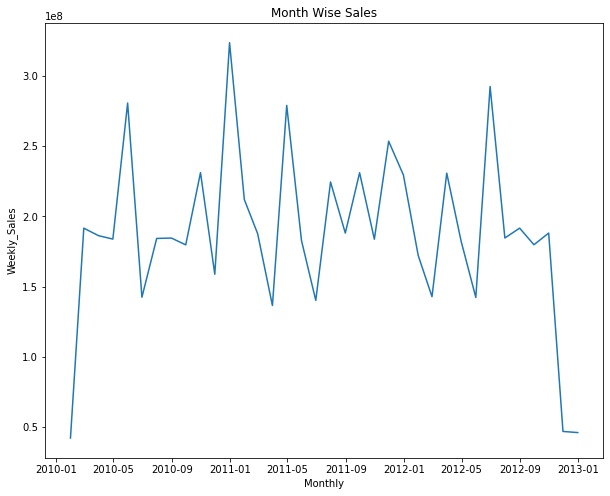

In [24]:
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()

fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')


In the Monthly_Sales Graph it is understood that the highest sum of sales is recorded in between jan-2011 to march-2011.

## Semester Sales

Text(0, 0.5, 'Weekly_Sales')

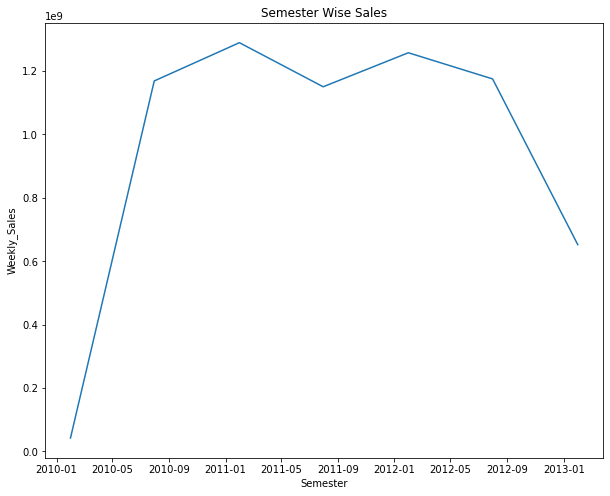

In [25]:
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()

fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

In the Semester Sales graph it is understood that at beginning of 1st sem of 2010 and 1st sem of 2013 sales are lowest .

## Conclusion

Store 14 has the maximum sales.

The Store 14 has the maximum standard deviation which we can conclude that sales in store 14 varies most.

Q3 growth rate is in losses compare Q2 and the Store 16 has the least loss of 3% compared the other stores and store 14 has highest loss of 18%.

Holidays which have higher sales than the mean sales in non-holiday season is during Thanks giving holidays.

During the Monthly_Sales the highest sum of sales is recorded in between jan-2011 to march-2011.

And during the Semester Sales  it is understood that at beginning of 1st sem of 2010 and 1st sem of 2013 sales are lowest .
